# 1.Import All useful Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_churn.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


# 2.First Know our data Or Structures of the data

In [8]:
df.shape

(227658, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227658 entries, 0 to 227657
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         227658 non-null  int64  
 1   Age                227657 non-null  float64
 2   Gender             227657 non-null  object 
 3   Tenure             227657 non-null  float64
 4   Usage Frequency    227657 non-null  float64
 5   Support Calls      227657 non-null  float64
 6   Payment Delay      227657 non-null  float64
 7   Subscription Type  227657 non-null  object 
 8   Contract Length    227657 non-null  object 
 9   Total Spend        227657 non-null  float64
 10  Last Interaction   227657 non-null  float64
 11  Churn              227657 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 20.8+ MB


In [12]:
df.isnull().sum()

CustomerID           0
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [14]:
df.drop(columns=['CustomerID'],inplace=True)

In [16]:
df.duplicated().sum()

0

In [18]:
# remove Na values
df.dropna(inplace=True)

In [20]:
df.shape

(227657, 11)

In [22]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000,227657.000000
mean,41.761163,30.929956,15.376189,5.187128,15.712045,543.516413,15.546080,0.841788
std,13.938336,17.284771,8.717090,3.141194,8.976491,259.813965,8.653985,0.364940
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,30.000000,16.000000,8.000000,2.000000,8.000000,318.000000,8.000000,1.000000
50%,42.000000,31.000000,15.000000,5.000000,16.000000,538.000000,16.000000,1.000000
75%,54.000000,46.000000,23.000000,8.000000,24.000000,769.000000,23.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# 3.EDA

## a. Univariate analysis

In [26]:
# Name of all columns
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

In [28]:
df.head(1)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0


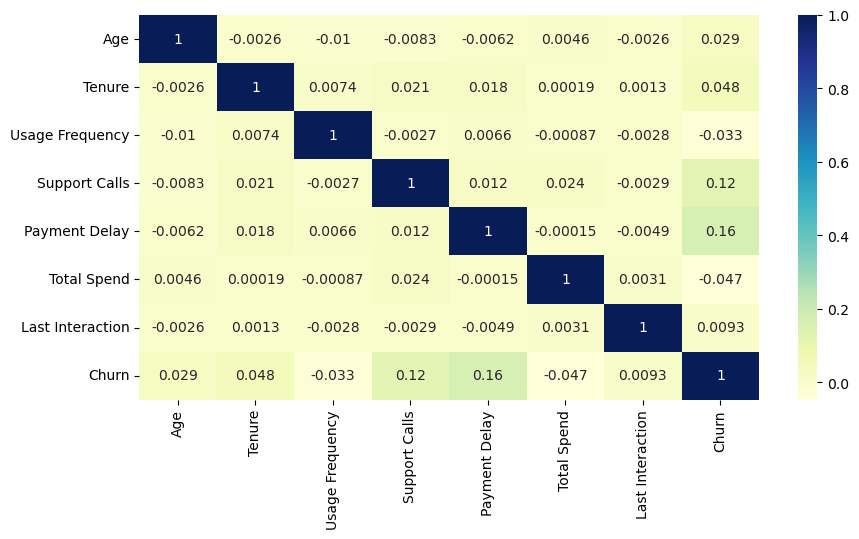

In [30]:
# Correlation Heatmap Matrix
plt.figure(figsize=(10,5))
dataplot = sns.heatmap(df.iloc[:,[0,2,3,4,5,8,9,10]].corr(), cmap="YlGnBu", annot=True)

- Age Column

In [32]:
df['Age'].describe()

count    227657.000000
mean         41.761163
std          13.938336
min          18.000000
25%          30.000000
50%          42.000000
75%          54.000000
max          65.000000
Name: Age, dtype: float64

(array([23533., 23303., 23351., 18678., 23254., 23097., 18351., 24918.,
        24434., 24738.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

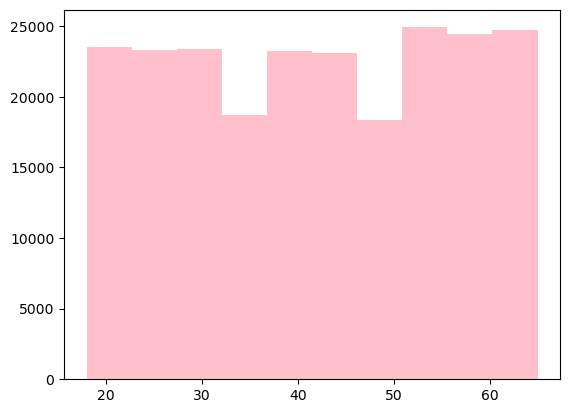

In [35]:
plt.hist(df["Age"],color='pink',bins = 10)

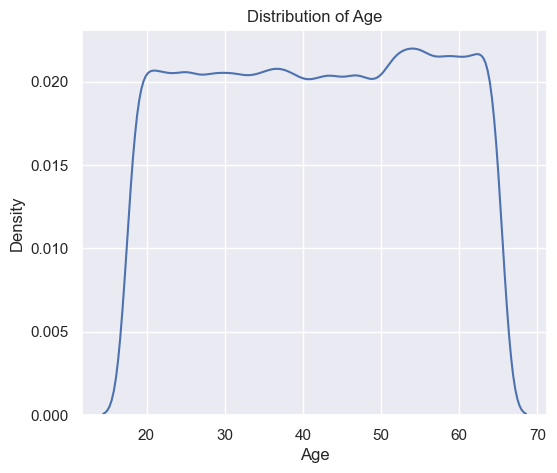

In [36]:
sns.set()
plt.figure(figsize = (6,5))
sns.distplot(df["Age"], hist = False)
plt.title("Distribution of Age")
plt.show()

In [38]:
df['Age'].skew()

-0.023872650759552305

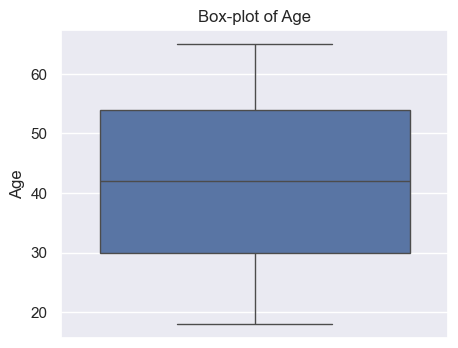

In [39]:
# Box-plot
plt.figure(figsize = (5,4))
sns.boxplot(df['Age'])
plt.title("Box-plot of Age")
plt.show()
# there are no any Outliers

- Gender Coulumn

Gender
Female    117025
Male      110632
Name: count, dtype: int64


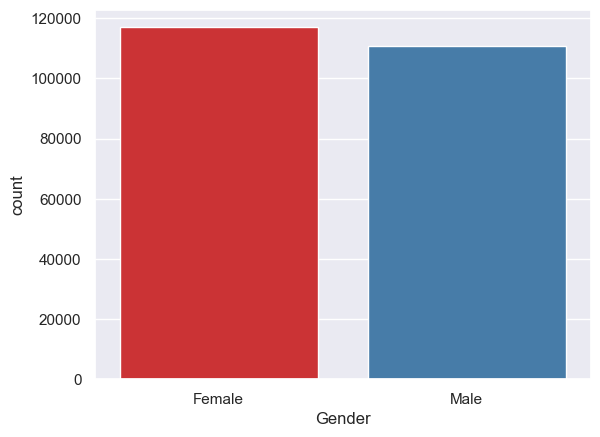

In [43]:
sns.barplot(x=df['Gender'].value_counts().index, y=df['Gender'].value_counts(), palette="Set1")
print(df['Gender'].value_counts())

- Tenure Column

In [45]:
df['Tenure'].describe()

count    227657.000000
mean         30.929956
std          17.284771
min           1.000000
25%          16.000000
50%          31.000000
75%          46.000000
max          60.000000
Name: Tenure, dtype: float64

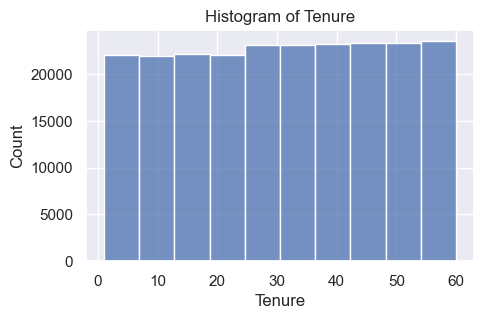

In [47]:
plt.figure(figsize = (5,3))
sns.histplot(df['Tenure'], bins = 10)
plt.title("Histogram of Tenure")
plt.show()

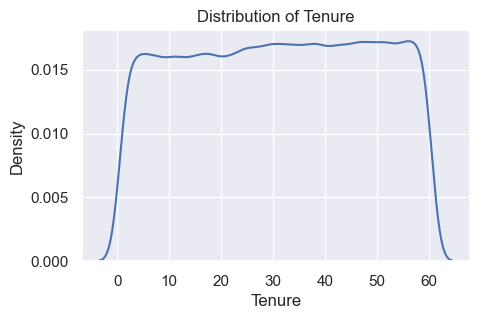

In [49]:
plt.figure(figsize = (5,3))
sns.distplot(df['Tenure'], hist = False)
plt.title("Distribution of Tenure")
plt.show()

In [51]:
df['Tenure'].skew()

-0.03501379465617829

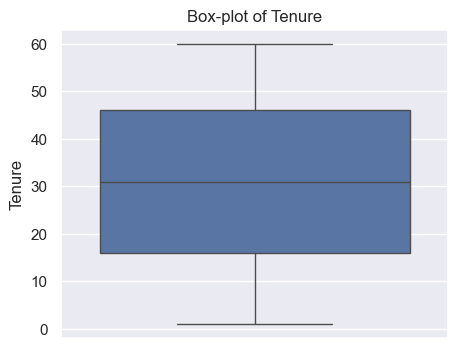

In [52]:
# Box-plot
plt.figure(figsize = (5,4))
sns.boxplot(df['Tenure'])
plt.title("Box-plot of Tenure")
plt.show()
# there are no any Outliers in the Tenure column

- Usage Frequency Column

In [55]:
# Summary of Usage Frequency
df['Usage Frequency'].describe()

count    227657.000000
mean         15.376189
std           8.717090
min           1.000000
25%           8.000000
50%          15.000000
75%          23.000000
max          30.000000
Name: Usage Frequency, dtype: float64

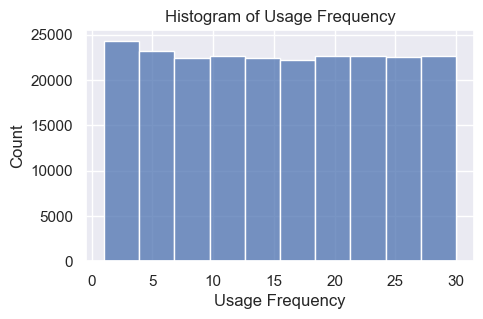

In [56]:
plt.figure(figsize = (5,3))
sns.histplot(df['Usage Frequency'], bins = 10)
plt.title("Histogram of Usage Frequency")
plt.show()

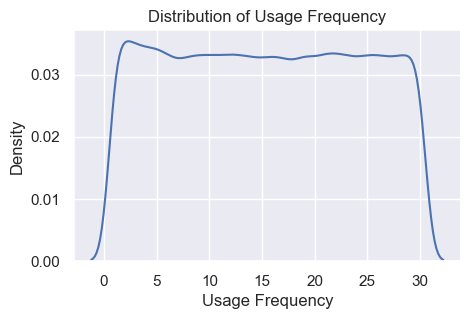

In [57]:
# Density Plot
plt.figure(figsize = (5,3))
sns.distplot(df['Usage Frequency'],hist = False)
plt.title("Distribution of Usage Frequency")
plt.show()

In [58]:
df['Usage Frequency'].skew()  # Skewness of Usage Frequency

0.010018269524509633

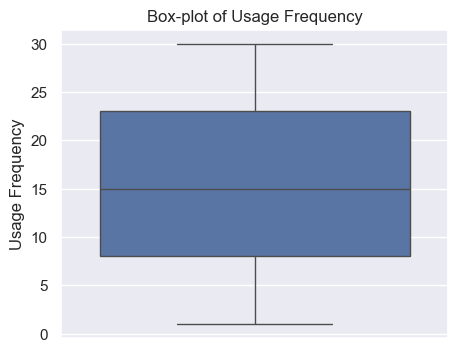

In [61]:
# Box-plot
plt.figure(figsize = (5,4))
sns.boxplot(df['Usage Frequency'])
plt.title("Box-plot of Usage Frequency")
plt.show()
# there are no any Outliers in the Usage Frequency column

- Support Calls column

In [63]:
# Value Count of unique Support Calls
print(df['Support Calls'].value_counts())

Support Calls
10.0    21986
7.0     21965
5.0     21931
9.0     21906
8.0     21876
6.0     21875
4.0     19980
3.0     19156
1.0     19114
0.0     19017
2.0     18851
Name: count, dtype: int64


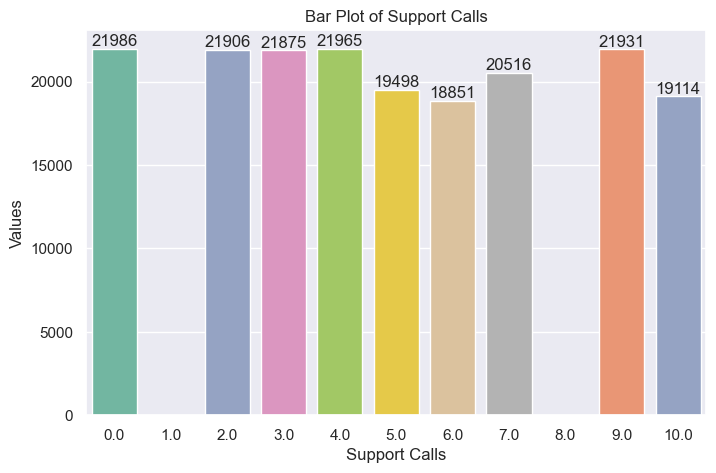

In [66]:
# Barplot of Support Calls 
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x = df['Support Calls'], y=df['Support Calls'].value_counts(), data=df, palette='Set2', ci = False)

# Adding the value counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

plt.title('Bar Plot of Support Calls')
plt.xlabel('Support Calls')
plt.ylabel('Values')
plt.show()

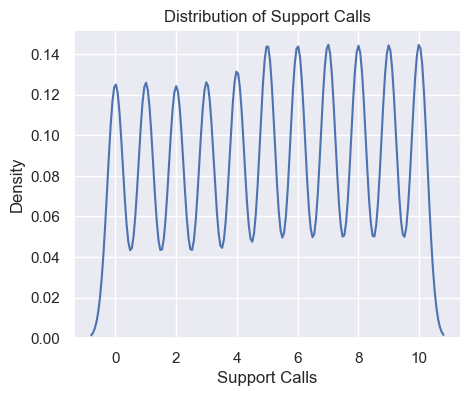

In [67]:
# Density Plot
plt.figure(figsize = (5,4))
sns.kdeplot(df['Support Calls'])
plt.title("Distribution of Support Calls")
plt.show()

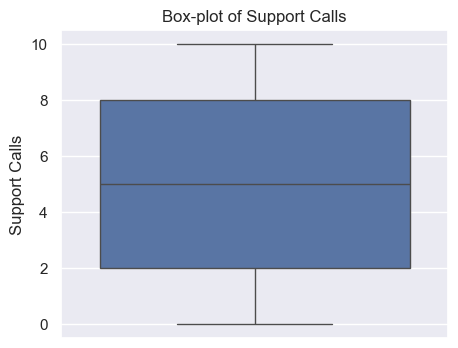

In [74]:
# Box-plot
plt.figure(figsize = (5,4))
sns.boxplot(df['Support Calls'])
plt.title("Box-plot of Support Calls")
plt.show()
# not any Outliers

In [76]:
# Summary Of Payment Delay
df['Payment Delay'].describe()

count    227657.000000
mean         15.712045
std           8.976491
min           0.000000
25%           8.000000
50%          16.000000
75%          24.000000
max          30.000000
Name: Payment Delay, dtype: float64

In [79]:
# all unique value in Payment Delay
df['Payment Delay'].unique()

array([18.,  8.,  7., 26., 16., 15.,  4., 11., 30., 25., 13., 22.,  5.,
       14.,  3., 10., 28.,  2.,  6., 27., 12., 29., 17., 24.,  9., 23.,
       21.,  1.,  0., 20., 19.])

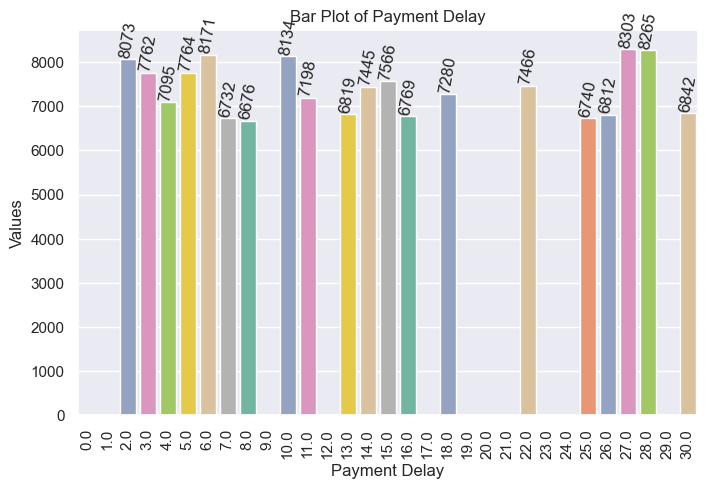

In [81]:
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x = df['Payment Delay'], y= df['Payment Delay'].value_counts(), data=df, palette='Set2', ci = False)

# Adding the value counts on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',rotation=80)

plt.xticks(rotation=90)
plt.title('Bar Plot of Payment Delay')
plt.xlabel('Payment Delay')
plt.ylabel('Values')
plt.show()

In [82]:
# Value count of all unique value of Subscription Type
df["Subscription Type"].value_counts()

Subscription Type
Standard    76152
Premium     75945
Basic       75560
Name: count, dtype: int64

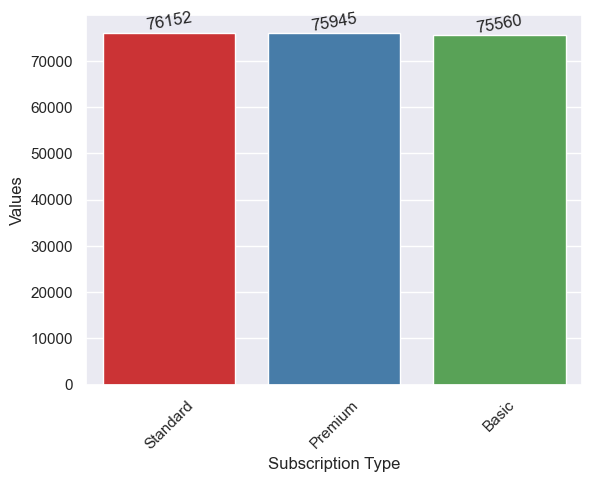

In [85]:
bar_plot = sns.barplot(x=df['Subscription Type'].value_counts().index, y=df['Subscription Type'].value_counts(), palette="Set1")
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',rotation=10)

plt.xticks(rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Values')
plt.show()

In [87]:
# Value count of all unique value of Contract Length
df["Contract Length"].value_counts()

Contract Length
Monthly      78260
Annual       75249
Quarterly    74148
Name: count, dtype: int64

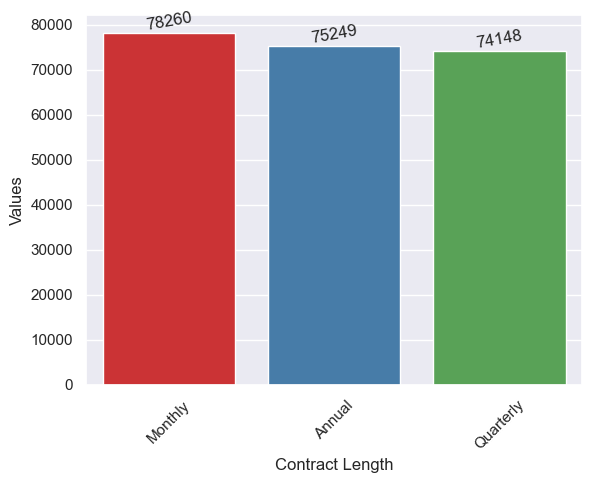

In [89]:
bar_plot = sns.barplot(x=df['Contract Length'].value_counts().index, y=df['Contract Length'].value_counts(), palette="Set1")
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom',rotation=10)

plt.xticks(rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Values')
plt.show()

- Total Spend

In [92]:
# Summary of Total Spend
df['Total Spend'].describe()

count    227657.000000
mean        543.516413
std         259.813965
min         100.000000
25%         318.000000
50%         538.000000
75%         769.000000
max        1000.000000
Name: Total Spend, dtype: float64

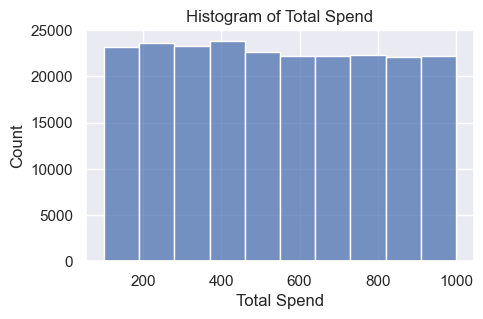

In [94]:
plt.figure(figsize = (5,3))
sns.histplot(df['Total Spend'],bins = 10)
plt.title("Histogram of Total Spend")
plt.show()

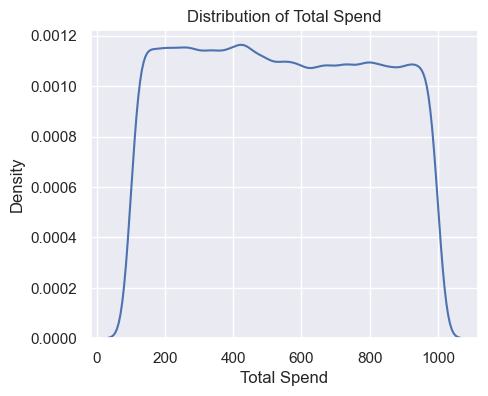

In [96]:
# density Plot
plt.figure(figsize = (5,4))
sns.kdeplot(df['Total Spend'])
plt.title("Distribution of Total Spend")
plt.show()

In [97]:
df["Total Spend"].skew() # skewness 

0.03715021029845599

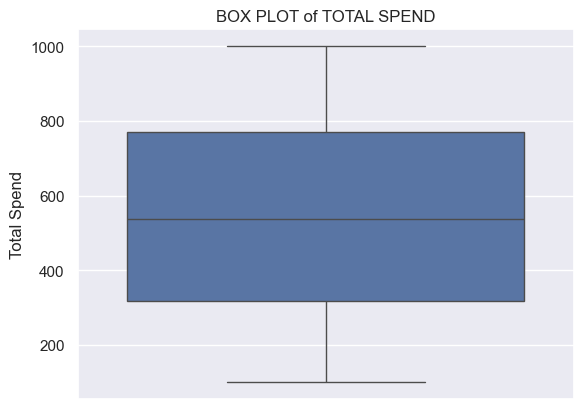

In [100]:
sns.boxplot(df["Total Spend"])
plt.title("BOX PLOT of TOTAL SPEND")
plt.show()

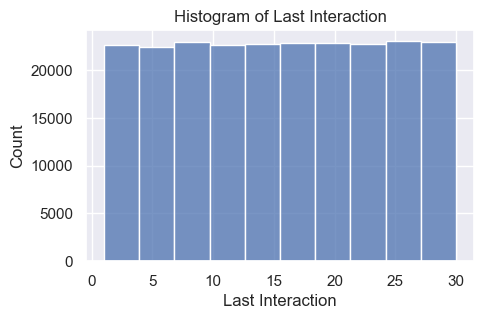

In [102]:
plt.figure(figsize = (5,3))
sns.histplot(df['Last Interaction'],bins = 10)
plt.title("Histogram of Last Interaction")
plt.show()

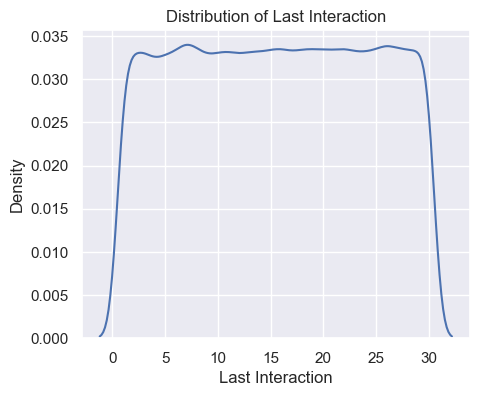

In [104]:
plt.figure(figsize = (5,4))
sns.kdeplot(df['Last Interaction'])
plt.title("Distribution of Last Interaction")
plt.show()

In [105]:
df["Last Interaction"].skew()

-0.00547480573555604

<Axes: ylabel='count'>

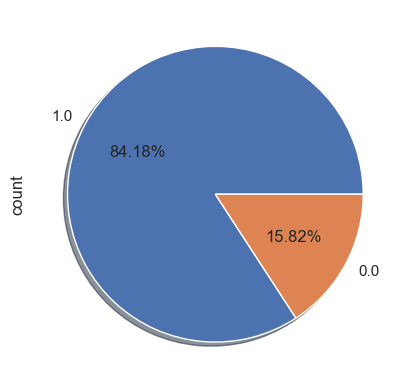

In [108]:
df["Churn"].value_counts().plot(kind = "pie",autopct='%1.2f%%', shadow=True)


In [110]:
# imblance DATA

### b.Bivariate Analysis

In [113]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [115]:
# Age vs Tenure Hue = Gender


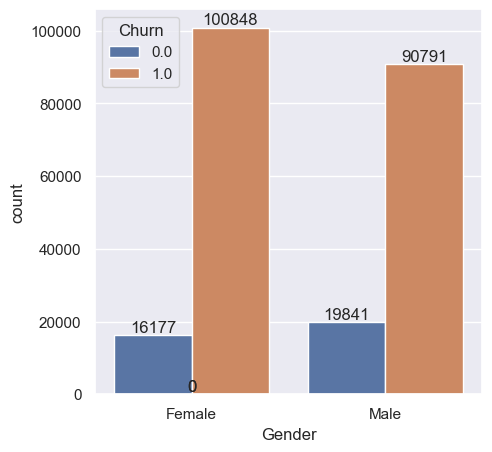

In [117]:
plt.figure(figsize = (5,5))
countplot = sns.countplot(x = "Gender", data = df, hue = "Churn")
for p in countplot.patches:
    countplot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

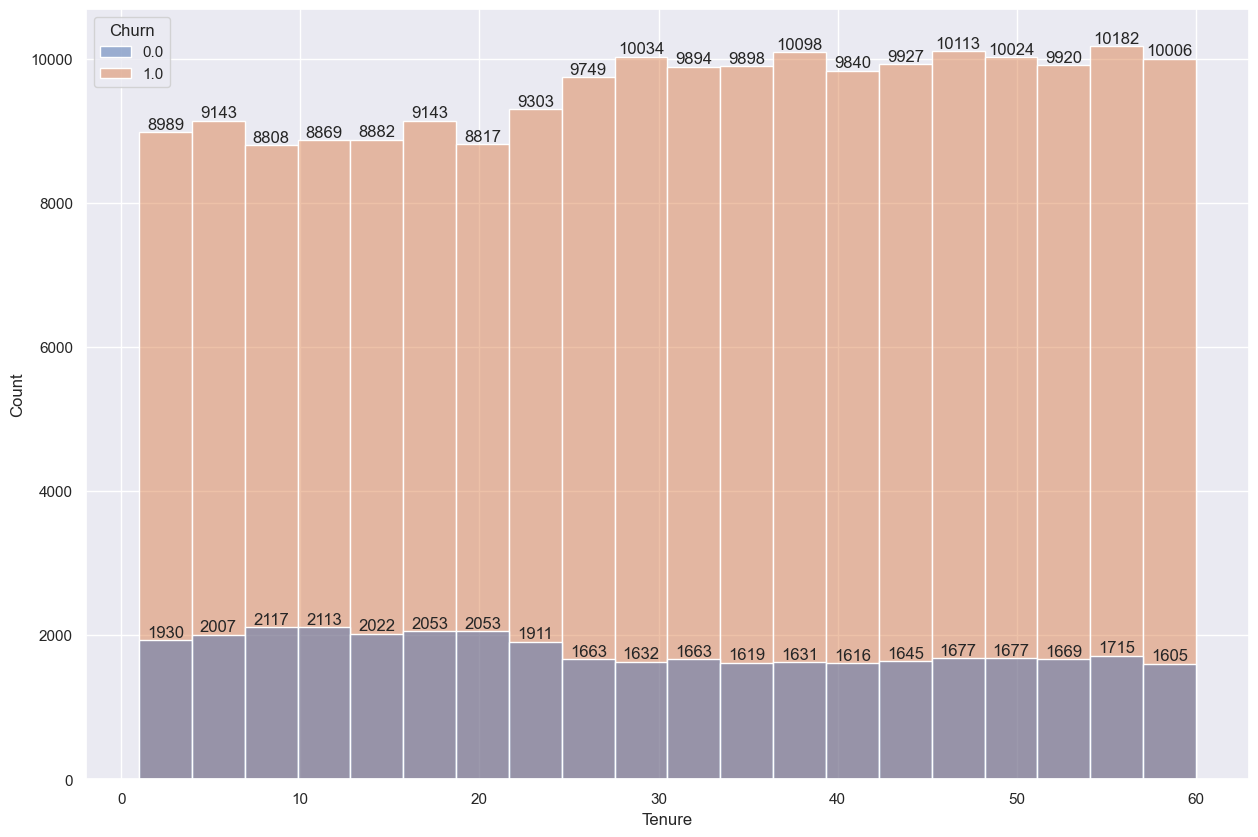

In [118]:
plt.figure(figsize = (15,10))
t = sns.histplot(x = df["Tenure"] , hue = df["Churn"], bins = 20)
for p in t.patches:
    t.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='bottom')

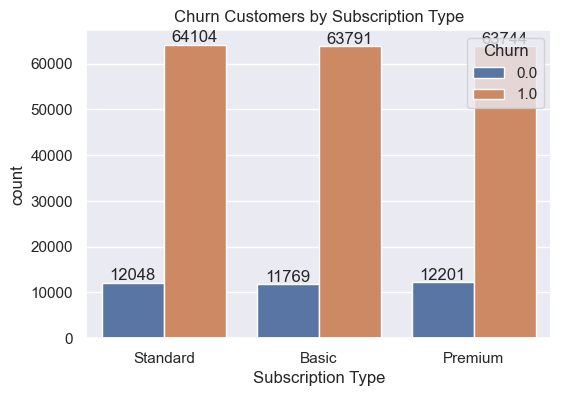

In [120]:
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, x = "Subscription Type", hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn Customers by Subscription Type")
plt.show()

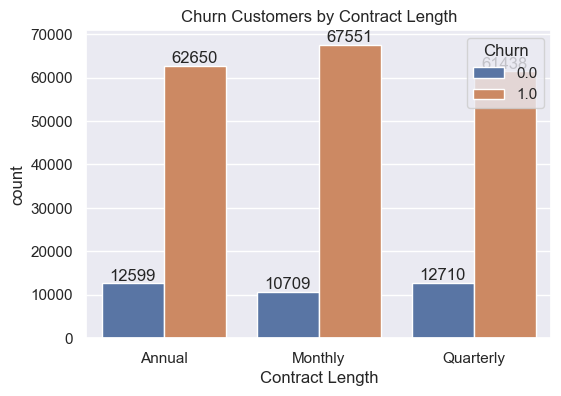

In [122]:
plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, x = "Contract Length", hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])

plt.title("Churn Customers by Contract Length")
plt.show()

In [124]:
!pip install scikit-learn

In [126]:
df['Subscription Type'].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [127]:
from sklearn.model_selection import train_test_split
x_train ,x_test, y_train,y_test = train_test_split(df.drop(columns=['Churn']),df['Churn'],test_size=0.2,random_state=42)

In [254]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [129]:
df["Subscription Type"].unique()

array(['Standard', 'Basic', 'Premium'], dtype=object)

In [130]:
df["Contract Length"].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [137]:
trf1 = ColumnTransformer([
    ("ohe_trf",OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore'),[1]),
    ("ordinal_trf1",OrdinalEncoder(),[6]),
    ("ordinal_trf2",OrdinalEncoder(),[7]),
], remainder='passthrough')

In [139]:
trf1

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_trf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 [1]),
                                ('ordinal_trf1', OrdinalEncoder(), [6]),
                                ('ordinal_trf2', OrdinalEncoder(), [7])])

In [141]:
trf2 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,10))
])

In [143]:
trf2

ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))])

In [145]:
from sklearn.pipeline import Pipeline # Capitalize pipeline to Pipeline

In [248]:
pipe1 = Pipeline(steps = [
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',DecisionTreeClassifier(random_state = 42))
])

In [250]:
pipe1.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_trf1',
                                                  OrdinalEncoder(), [6]),
                                                 ('ordinal_trf2',
                                                  OrdinalEncoder(), [7])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf3', DecisionTreeClassifier(random_state=42))])

In [151]:
pipe2 = Pipeline(steps = [
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf4',LogisticRegression())
])

In [153]:
pipe2.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_trf1',
                                                  OrdinalEncoder(), [6]),
                                                 ('ordinal_trf2',
                                                  OrdinalEncoder(), [7])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4', LogisticRegression())])

In [155]:
pipe3 = Pipeline(steps = [
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf5',RandomForestClassifier())
])

In [157]:
pipe3.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_trf1',
                                                  OrdinalEncoder(), [6]),
                                                 ('ordinal_trf2',
                                                  OrdinalEncoder(), [7])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf5', RandomForestClassifier())])

In [159]:
y_pred1 = pipe1.predict(x_test)

In [161]:
y_pred2 = pipe2.predict(x_test)

In [163]:
y_pred3 = pipe3.predict(x_test)

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [174]:
print("Accuracy Score for th DT Model", accuracy_score(y_test,y_pred1))
print("Accuracy Score for th LGR Model", accuracy_score(y_test,y_pred2))
print("Accuracy Score for th  RF Model", accuracy_score(y_test,y_pred3))

Accuracy Score for th DT Model 0.7659448300096635
Accuracy Score for th LGR Model 0.840090485812176
Accuracy Score for th  RF Model 0.8565184924887991


In [176]:
print("Confusion Matrix for DT model \n", confusion_matrix(y_test,y_pred1))
print("Confusion Matrix for LGR model \n", confusion_matrix(y_test,y_pred2))
print("Confusion Matrix for RF model \n", confusion_matrix(y_test,y_pred3))

Confusion Matrix for DT model 
 [[ 2363  4912]
 [ 5745 32512]]
Confusion Matrix for LGR model 
 [[    7  7268]
 [   13 38244]]
Confusion Matrix for RF model 
 [[  794  6481]
 [   52 38205]]


In [178]:
print("Classification Report for DT model :\n",classification_report(y_test,y_pred1))
print("Classification Report for LGR model :\n",classification_report(y_test,y_pred2))
print("Classification Report for RF model :\n",classification_report(y_test,y_pred3))

Classification Report for DT model :
               precision    recall  f1-score   support

         0.0       0.29      0.32      0.31      7275
         1.0       0.87      0.85      0.86     38257

    accuracy                           0.77     45532
   macro avg       0.58      0.59      0.58     45532
weighted avg       0.78      0.77      0.77     45532

Classification Report for LGR model :
               precision    recall  f1-score   support

         0.0       0.35      0.00      0.00      7275
         1.0       0.84      1.00      0.91     38257

    accuracy                           0.84     45532
   macro avg       0.60      0.50      0.46     45532
weighted avg       0.76      0.84      0.77     45532

Classification Report for RF model :
               precision    recall  f1-score   support

         0.0       0.94      0.11      0.20      7275
         1.0       0.85      1.00      0.92     38257

    accuracy                           0.86     45532
   macro avg 

In [206]:
# hyperperameter Tuning
param_grid = {
    'trf3__max_depth': [3, 5, 7, 10],
    'trf3__min_samples_split': [2, 5, 10],
    'trf3__min_samples_leaf': [1, 2, 4],
    'trf_random_state':[30,35,42],
    'trf3__criterion': ['gini', 'entropy']
}

In [212]:
param_grid = {
    'trf3__max_depth': [3, 5, 7, 10],
    'trf3__min_samples_split': [2, 5, 10],
    'trf3__min_samples_leaf': [1, 2, 4],
    'trf3__random_state': [30, 35, 42],
    'trf3__criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=pipe1, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2)

In [208]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe1, param_grid, cv=5)

In [214]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=30; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=30; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=30; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=30; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=30; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_samples_leaf=1, trf3__min_samples_split=2, trf3__random_state=35; total time=   0.2s
[CV] END trf3__criterion=gini, trf3__max_depth=3, trf3__min_sample

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('trf1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe_trf',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         [1]),
                                                                        ('ordinal_trf1',
                                                                         OrdinalEncoder(),
                                                                         [6]),
                                                                        ('ordinal_trf2',
                                                                         OrdinalEncoder(),
                                                                         [7])])),
                                       ('trf2',
                                        ColumnTransformer(transformers=[('scale',
                                                                         MinMaxScaler(),
                                                                         slice(0, 10, None))])),
                                       ('trf3',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid={'trf3__criterion': ['gini', 'entropy'],
                         'trf3__max_depth': [3, 5, 7, 10],
                         'trf3__min_samples_leaf': [1, 2, 4],
                         'trf3__min_samples_split': [2, 5, 10],
                         'trf3__random_state': [30, 35, 42]},
             scoring='accuracy', verbose=2)

In [216]:
y_pred_grid = grid_search.best_estimator_.predict(x_test)

In [218]:
grid_accuracy = accuracy_score(y_test, y_pred_grid)
print("Grid Search Accuracy:", grid_accuracy)

Grid Search Accuracy: 0.8532241061231661


In [220]:
grid_confusion_matrix = confusion_matrix(y_test, y_pred_grid)
print("Grid Search Confusion Matrix:\n", grid_confusion_matrix)

Grid Search Confusion Matrix:
 [[  830  6445]
 [  238 38019]]


In [222]:
grid_classification_report = classification_report(y_test, y_pred_grid)
print("Grid Search Classification Report:\n", grid_classification_report)

Grid Search Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.11      0.20      7275
         1.0       0.86      0.99      0.92     38257

    accuracy                           0.85     45532
   macro avg       0.82      0.55      0.56     45532
weighted avg       0.84      0.85      0.80     45532



In [224]:
from sklearn.tree import plot_tree

In [226]:
clas = Pipeline(steps = [
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',DecisionTreeClassifier(max_depth=3, random_state = 42))
])

In [228]:
clas.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_trf',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1]),
                                                 ('ordinal_trf1',
                                                  OrdinalEncoder(), [6]),
                                                 ('ordinal_trf2',
                                                  OrdinalEncoder(), [7])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf3', DecisionTreeClassifier(max_depth=3, random_state=42))])

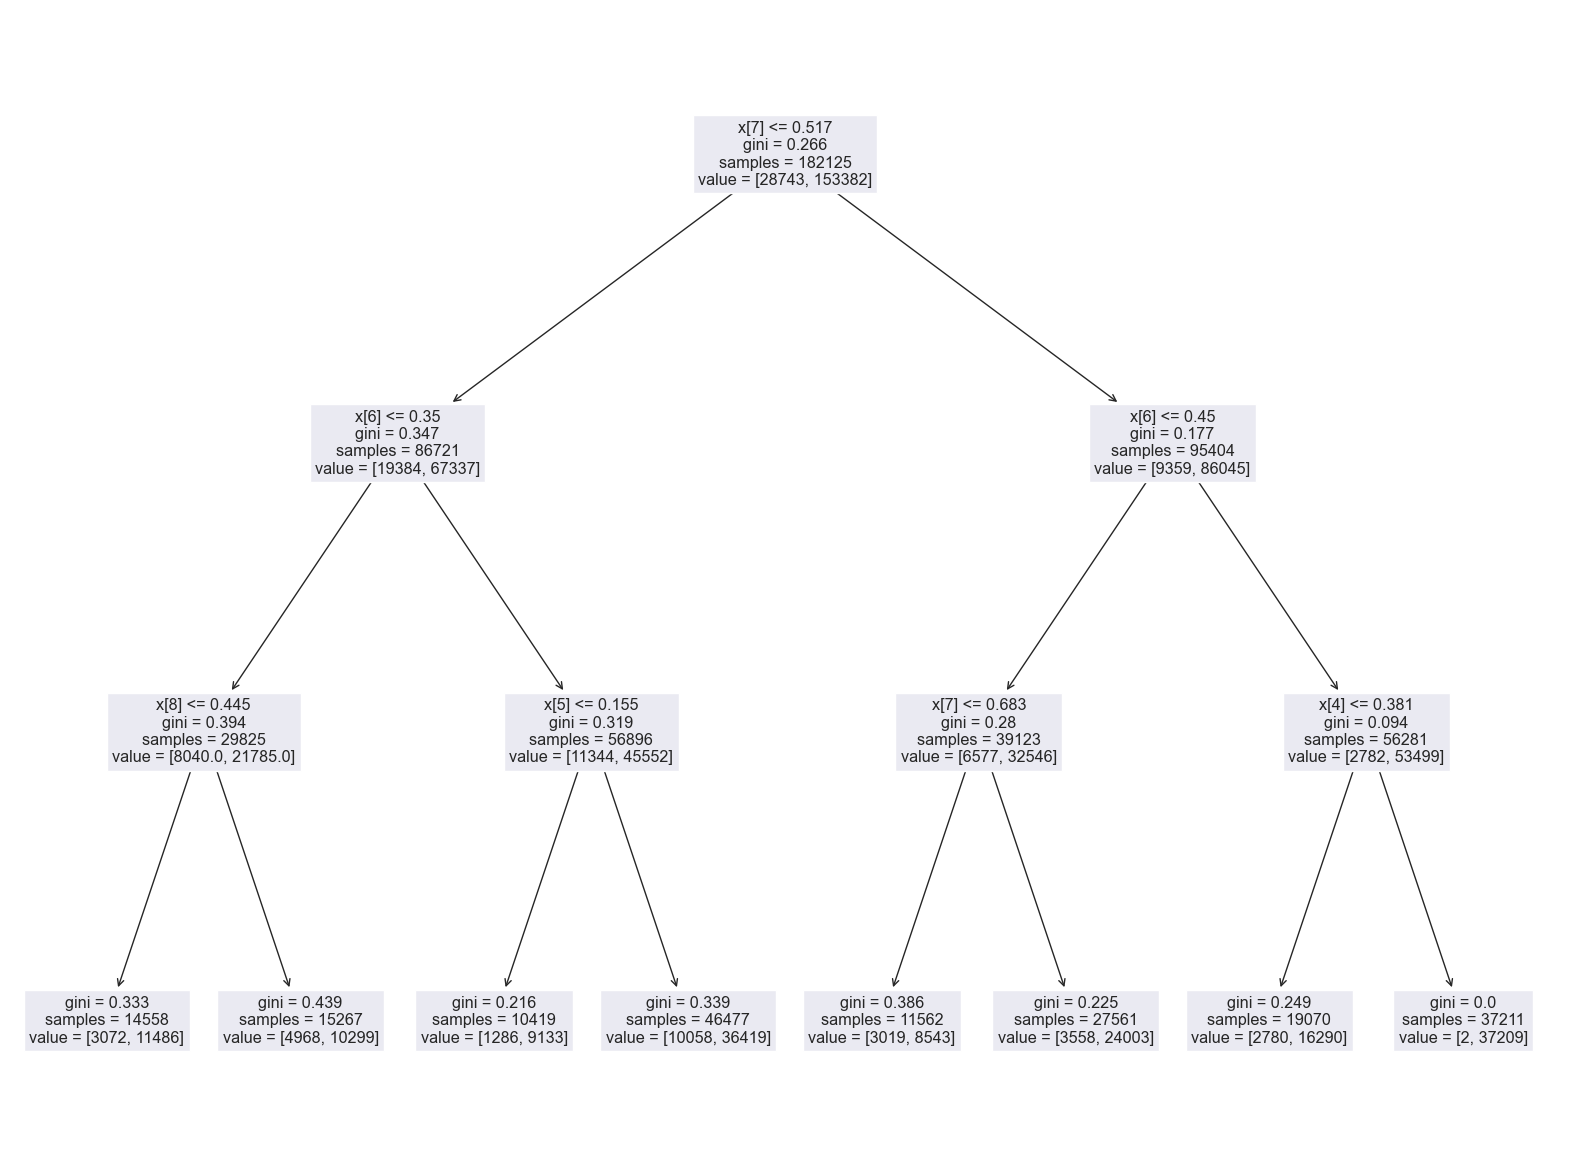

In [202]:
plt.figure(figsize=(20, 15))
plot_tree(clas.named_steps["trf3"])
plt.show()